## Install Packages

In [1]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, pyplot
from matplotlib.dates import YearLocator, MonthLocator
import matplotlib.dates as mdates
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm

## Read Data

In [3]:
# read data
dallas_data = pd.read_csv('national_dallas_final.csv', index_col=0, parse_dates=True)
miami_data = pd.read_csv('national_miami_final.csv', index_col=0, parse_dates=True)
sd_data = pd.read_csv('national_sd_final.csv', index_col=0, parse_dates=True)
denver_data = pd.read_csv('national_denver_final.csv', index_col=0, parse_dates=True)

In [4]:
dallas_data = dallas_data.drop('Regimes',axis=1)
miami_data = miami_data.drop('Regimes',axis=1)
sd_data = sd_data.drop('Regimes',axis=1)
denver_data = denver_data.drop('Regimes',axis=1)

Next, we need to transform and normalize the data.

In [5]:
dallas_data['HPI_pct'] = dallas_data['HPI'].pct_change()
dallas_data['Mortgage_Rate'] = dallas_data['Mortgage_Rate'].pct_change()
dallas_data['AL'] = dallas_data['AL'].pct_change()
dallas_data['AL_monthly'] = dallas_data['AL_monthly'].pct_change()
dallas_data['GDP'] = dallas_data['GDP'].pct_change()
dallas_data['CPI'] = dallas_data['CPI'].pct_change()
dallas_data['Treasury'] = dallas_data['Treasury'].pct_change()
dallas_data['Credit_Availability'] = dallas_data['Credit_Availability'].pct_change()
dallas_data['Corp_debt'] = dallas_data['Corp_debt'].pct_change()
dallas_data['unemployment'] = dallas_data['unemployment'].pct_change()
dallas_data['BusinessConfidenceIndex'] = dallas_data['BusinessConfidenceIndex'].pct_change()
dallas_data['usedauto'] = dallas_data['usedauto'].pct_change()
dallas_data['retailauto'] = dallas_data['retailauto'].pct_change()
dallas_data['luxury'] = dallas_data['luxury'].pct_change()
dallas_data['mhi'] = dallas_data['mhi'].pct_change()

In [6]:
miami_data['HPI_pct'] = miami_data['HPI'].pct_change()
miami_data['Mortgage_Rate'] = miami_data['Mortgage_Rate'].pct_change()
miami_data['AL'] = miami_data['AL'].pct_change()
miami_data['AL_monthly'] = miami_data['AL_monthly'].pct_change()
miami_data['GDP'] = miami_data['GDP'].pct_change()
miami_data['CPI'] = miami_data['CPI'].pct_change()
miami_data['Treasury'] = miami_data['Treasury'].pct_change()
miami_data['Credit_Availability'] = miami_data['Credit_Availability'].pct_change()
miami_data['Corp_debt'] = miami_data['Corp_debt'].pct_change()
miami_data['unemployment'] = miami_data['unemployment'].pct_change()
miami_data['BusinessConfidenceIndex'] = miami_data['BusinessConfidenceIndex'].pct_change()
miami_data['usedauto'] = miami_data['usedauto'].pct_change()
miami_data['retailauto'] = miami_data['retailauto'].pct_change()
miami_data['luxury'] = miami_data['luxury'].pct_change()
miami_data['mhi'] = miami_data['mhi'].pct_change()

In [7]:
denver_data['HPI_pct'] = denver_data['HPI'].pct_change()
denver_data['Mortgage_Rate'] = denver_data['Mortgage_Rate'].pct_change()
denver_data['AL'] = denver_data['AL'].pct_change()
denver_data['AL_monthly'] = denver_data['AL_monthly'].pct_change()
denver_data['GDP'] = denver_data['GDP'].pct_change()
denver_data['CPI'] = denver_data['CPI'].pct_change()
denver_data['Treasury'] = denver_data['Treasury'].pct_change()
denver_data['Credit_Availability'] = denver_data['Credit_Availability'].pct_change()
denver_data['Corp_debt'] = denver_data['Corp_debt'].pct_change()
denver_data['unemployment'] = denver_data['unemployment'].pct_change()
denver_data['BusinessConfidenceIndex'] = denver_data['BusinessConfidenceIndex'].pct_change()
denver_data['usedauto'] = denver_data['usedauto'].pct_change()
denver_data['retailauto'] = denver_data['retailauto'].pct_change()
denver_data['luxury'] = denver_data['luxury'].pct_change()
denver_data['mhi'] = denver_data['mhi'].pct_change()

In [8]:
sd_data['HPI_pct'] = sd_data['HPI'].pct_change()
sd_data['Mortgage_Rate'] = sd_data['Mortgage_Rate'].pct_change()
sd_data['AL'] = sd_data['AL'].pct_change()
sd_data['AL_monthly'] = sd_data['AL_monthly'].pct_change()
sd_data['GDP'] = sd_data['GDP'].pct_change()
sd_data['CPI'] = sd_data['CPI'].pct_change()
sd_data['Treasury'] = sd_data['Treasury'].pct_change()
sd_data['Credit_Availability'] = sd_data['Credit_Availability'].pct_change()
sd_data['Corp_debt'] = sd_data['Corp_debt'].pct_change()
sd_data['unemployment'] = sd_data['unemployment'].pct_change()
sd_data['BusinessConfidenceIndex'] = sd_data['BusinessConfidenceIndex'].pct_change()
sd_data['usedauto'] = sd_data['usedauto'].pct_change()
sd_data['retailauto'] = sd_data['retailauto'].pct_change()
sd_data['luxury'] = sd_data['luxury'].pct_change()
sd_data['mhi'] = sd_data['mhi'].pct_change()

Then, we need to make sure the dataset does not have null or inf values.

In [9]:
dallas_data = dallas_data.dropna()
dallas_data = dallas_data[~dallas_data.isin([np.inf, -np.inf]).any(axis=1)]  # Drop rows with inf values

miami_data = miami_data.dropna()
miami_data = miami_data[~miami_data.isin([np.inf, -np.inf]).any(axis=1)]

denver_data = denver_data.dropna()
denver_data = denver_data[~denver_data.isin([np.inf, -np.inf]).any(axis=1)]

sd_data = sd_data.dropna()
sd_data = sd_data[~sd_data.isin([np.inf, -np.inf]).any(axis=1)]

Check for null and inf values

In [10]:
# dallas
if np.isinf(dallas_data.values).any():
    print("DataFrame contains inf values")
    # Optionally, you can print the rows with inf values
    print(dallas_data[np.isinf(dallas_data).any(axis=1)])
else:
    print('No null or inf values for dallas.')

# miami
if np.isinf(miami_data.values).any():
    print("DataFrame contains inf values")
    # Optionally, you can print the rows with inf values
    print(miami_data[np.isinf(miami_data).any(axis=1)])
else:
    print('No null or inf values for miami.')

# denver
if np.isinf(denver_data.values).any():
    print("DataFrame contains inf values")
    # Optionally, you can print the rows with inf values
    print(denver_data[np.isinf(denver_data).any(axis=1)])
else:
    print('No null or inf values for denver.')

# san diego
if np.isinf(sd_data.values).any():
    print("DataFrame contains inf values")
    # Optionally, you can print the rows with inf values
    print(sd_data[np.isinf(sd_data).any(axis=1)])
else:
    print('No null or inf values for san diego.')

No null or inf values for dallas.
No null or inf values for miami.
No null or inf values for denver.
No null or inf values for san diego.


In [ ]:
dallas_data.shape

(439, 18)

## Lagging Detection
- using granger causality test to find lags for each feature for predicting HPI

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_test(data, target, max_lag):
    test_results = {}
    for col in data.columns:
        test_results[col] = grangercausalitytests(
            pd.concat([target, data[col]], axis=1),
            max_lag,
            verbose=False
        )
    return test_results

def extract_p_values(granger_results):
    p_values = {}
    for col, lags in granger_results.items():
        p_values[col] = {}
        for lag, result in lags.items():
            p_values[col][lag] = round(result[0]['ssr_ftest'][1], 4)
    return p_values

def find_best_lags(p_values, significance_level=0.05):
    best_lags = {}
    for col, lags in p_values.items():
        best_lags[col] = None
        for lag, p_value in lags.items():
            if p_value < significance_level:
                best_lags[col] = lag
                break
    return best_lags

In [12]:
# find lags for dallas
target = dallas_data[['HPI']]
features = dallas_data.drop('HPI', axis=1)
features = dallas_data.drop('HPI_pct', axis=1)

max_lag = 12
granger_results = granger_causality_test(features, target, max_lag)

# Extract p-values
p_values = extract_p_values(granger_results)

# Find the best lags
best_lags = find_best_lags(p_values)

print("Dallas, Best lags for each feature:")
for feature, lag in best_lags.items():
    print(f"{feature}: {lag}")

for feature, lag in best_lags.items():
    if lag == None:
        lag = 0
    dallas_data[feature] = dallas_data[feature].shift(lag)
dallas_data = dallas_data.dropna()

# dallas_data.corr()['HPI'].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

Dallas, Best lags for each feature:
Mortgage_Rate: 2
AL: 2
AL_monthly: 2
GDP: 1
CPI: 1
Treasury: None
Credit_Availability: None
Corp_debt: 1
unemployment: 10
BusinessConfidenceIndex: 1
usedauto: 5
retailauto: 8
luxury: 8
MultiFamilyPermits: 1
SingleFamilyPermits: None
HPI: None
mhi: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [13]:
# find lags for miami
target = miami_data[['HPI']]
features = miami_data.drop('HPI', axis=1)
features = miami_data.drop('HPI_pct', axis=1)

max_lag = 12
granger_results = granger_causality_test(features, target, max_lag)

# Extract p-values
p_values = extract_p_values(granger_results)

# Find the best lags
best_lags = find_best_lags(p_values)

print("Miami, Best lags for each feature:")
for feature, lag in best_lags.items():
    print(f"{feature}: {lag}")

for feature, lag in best_lags.items():
  if lag == None:
    lag = 0
  miami_data[feature] = miami_data[feature].shift(lag)
miami_data = miami_data.dropna()

# miami_data.corr()['HPI'].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

Miami, Best lags for each feature:
Mortgage_Rate: 2
AL: 2
AL_monthly: 2
GDP: 1
CPI: None
Treasury: None
Credit_Availability: None
Corp_debt: 1
unemployment: None
BusinessConfidenceIndex: None
usedauto: None
retailauto: None
luxury: None
MultiFamilyPermits: 1
SingleFamilyPermits: 1
HPI: None
mhi: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [14]:
# find lags for denver
target = denver_data[['HPI']]
features = denver_data.drop('HPI', axis=1)
features = denver_data.drop('HPI_pct', axis=1)

max_lag = 12
granger_results = granger_causality_test(features, target, max_lag)

# Extract p-values
p_values = extract_p_values(granger_results)

# Find the best lags
best_lags = find_best_lags(p_values)

print("Denver, Best lags for each feature:")
for feature, lag in best_lags.items():
    print(f"{feature}: {lag}")

for feature, lag in best_lags.items():
  if lag == None:
    lag = 0
  denver_data[feature] = denver_data[feature].shift(lag)
denver_data = denver_data.dropna()

# denver_data.corr()['HPI'].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

Denver, Best lags for each feature:
Mortgage_Rate: 2
AL: 2
AL_monthly: 2
GDP: 1
CPI: None
Treasury: None
Credit_Availability: None
Corp_debt: 1
unemployment: 10
BusinessConfidenceIndex: 8
usedauto: 1
retailauto: 9
luxury: 2
MultiFamilyPermits: 1
SingleFamilyPermits: 1
HPI: None
mhi: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [15]:
# find lags for sd
target = sd_data[['HPI']]
features = sd_data.drop('HPI', axis=1)
features = sd_data.drop('HPI_pct', axis=1)

max_lag = 12
granger_results = granger_causality_test(features, target, max_lag)

# Extract p-values
p_values = extract_p_values(granger_results)

# Find the best lags
best_lags = find_best_lags(p_values)

print("San Diego, Best lags for each feature:")
for feature, lag in best_lags.items():
    print(f"{feature}: {lag}")

for feature, lag in best_lags.items():
  if lag == None:
    lag = 0
  sd_data[feature] = sd_data[feature].shift(lag)
sd_data = sd_data.dropna()

# sd_data.corr()['HPI'].sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

San Diego, Best lags for each feature:
Mortgage_Rate: 2
AL: 2
AL_monthly: 2
GDP: 1
CPI: None
Treasury: None
Credit_Availability: None
Corp_debt: 1
unemployment: 10
BusinessConfidenceIndex: 2
usedauto: None
retailauto: None
luxury: None
MultiFamilyPermits: 1
SingleFamilyPermits: 1
HPI: None
mhi: 1


## Regime Detection
- find highly correlated features
- regime detection & model
- get feature importance score

### Find highly correlated features with HPI

In [16]:
df_temp_dallas = dallas_data.copy(deep=True)
ttt_dallas = df_temp_dallas.drop('HPI', axis=1)
df_temp_dallas = df_temp_dallas.dropna()

In [17]:
df_temp_miami = miami_data.copy(deep=True)
ttt_miami = df_temp_miami.drop('HPI', axis=1)
df_temp_miami = df_temp_miami.dropna()

In [18]:
df_temp_denver = denver_data.copy(deep=True)
ttt_denver = df_temp_denver.drop('HPI', axis=1)
df_temp_denver = df_temp_denver.dropna()

In [19]:
df_temp_sd = sd_data.copy(deep=True)
ttt_sd = df_temp_sd.drop('HPI', axis=1)
df_temp_sd = df_temp_sd.dropna()

Find correlation among features

In [20]:
print('Dallas')
df_temp_dallas.corr()['HPI_pct'].sort_values(ascending=False)

Dallas


HPI_pct                    1.000000
HPI                        0.552663
MultiFamilyPermits         0.190783
mhi                        0.188313
SingleFamilyPermits        0.176922
unemployment               0.112494
GDP                        0.080954
Treasury                   0.063055
retailauto                 0.028723
luxury                     0.024123
Mortgage_Rate              0.019805
usedauto                  -0.003651
AL_monthly                -0.003904
AL                        -0.004239
Credit_Availability       -0.006916
CPI                       -0.046466
BusinessConfidenceIndex   -0.144780
Corp_debt                 -0.255737
Name: HPI_pct, dtype: float64

In [21]:
print('Miami')
df_temp_miami.corr()['HPI_pct'].sort_values(ascending=False)

Miami


HPI_pct                    1.000000
SingleFamilyPermits        0.450540
MultiFamilyPermits         0.357574
GDP                        0.218487
mhi                        0.190948
HPI                        0.107619
CPI                        0.097400
usedauto                   0.068257
Mortgage_Rate              0.045497
Treasury                   0.037240
retailauto                 0.027171
Credit_Availability        0.003164
AL_monthly                -0.041104
AL                        -0.041345
unemployment              -0.069672
BusinessConfidenceIndex   -0.073763
luxury                    -0.087458
Corp_debt                 -0.213791
Name: HPI_pct, dtype: float64

In [22]:
print('Denver')
df_temp_denver.corr()['HPI_pct'].sort_values(ascending=False)

Denver


HPI_pct                    1.000000
MultiFamilyPermits         0.479383
SingleFamilyPermits        0.297331
HPI                        0.281227
mhi                        0.172382
BusinessConfidenceIndex    0.136428
unemployment               0.110779
GDP                        0.105206
usedauto                   0.091177
Mortgage_Rate              0.062342
retailauto                 0.054631
Treasury                   0.045419
CPI                        0.043892
luxury                     0.010577
Credit_Availability       -0.014066
AL_monthly                -0.055028
AL                        -0.055251
Corp_debt                 -0.290346
Name: HPI_pct, dtype: float64

In [23]:
print('San Diego')
df_temp_sd.corr()['HPI_pct'].sort_values(ascending=False)

San Diego


HPI_pct                    1.000000
SingleFamilyPermits        0.311632
GDP                        0.197884
MultiFamilyPermits         0.119164
mhi                        0.111562
Mortgage_Rate              0.081511
luxury                     0.077498
unemployment               0.056330
Treasury                   0.047487
BusinessConfidenceIndex    0.039680
HPI                        0.027710
CPI                        0.012484
retailauto                 0.001419
usedauto                   0.000042
Credit_Availability       -0.031576
AL_monthly                -0.072671
AL                        -0.072935
Corp_debt                 -0.155449
Name: HPI_pct, dtype: float64

Then, we could first get a list of features highly correlated with HPI.

In [24]:
cols_high_corr_with_hpi_dallas = df_temp_dallas.corr()['HPI'].sort_values(ascending=False)[1:6].index
cols_high_corr_with_hpi_miami = df_temp_miami.corr()['HPI'].sort_values(ascending=False)[1:6].index
cols_high_corr_with_hpi_denver = df_temp_denver.corr()['HPI'].sort_values(ascending=False)[1:6].index
cols_high_corr_with_hpi_sd = df_temp_sd.corr()['HPI'].sort_values(ascending=False)[1:6].index

In [25]:
cols_high_corr_with_hpi_dallas

Index(['HPI_pct', 'mhi', 'SingleFamilyPermits', 'Credit_Availability',
       'unemployment'],
      dtype='object')

Furthermore, we could visualize correlations of featuers using corrlation matrix for each city.

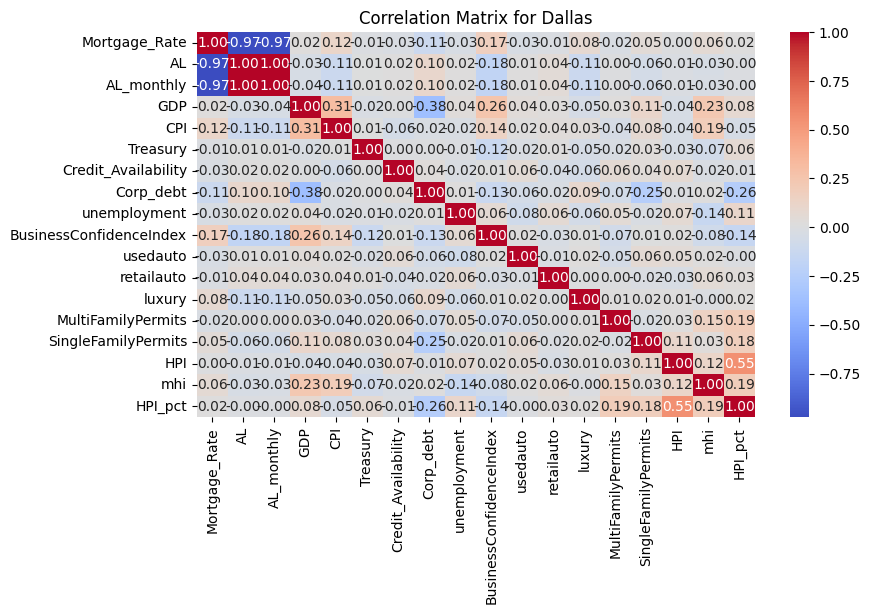

In [30]:
# dallas
corr_matrix_dallas = df_temp_dallas.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix_dallas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Dallas')
plt.show()

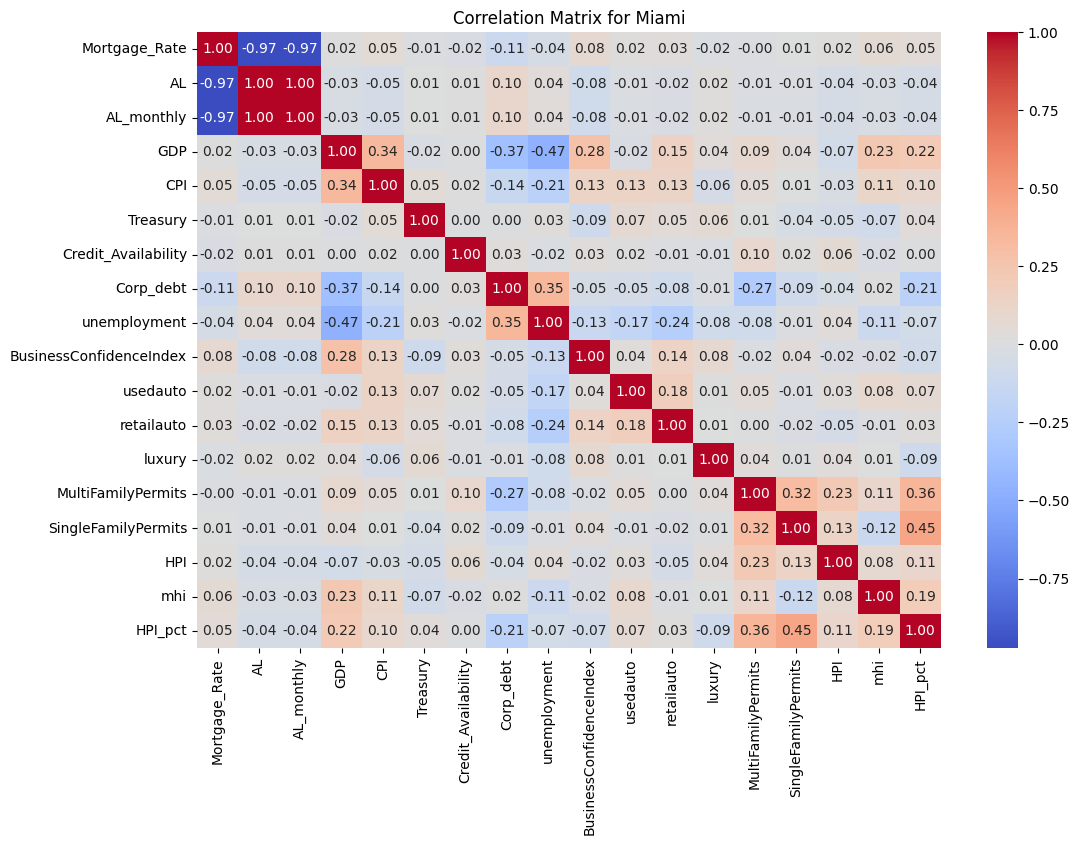

In [31]:
# miami
corr_matrix_miami = df_temp_miami.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_miami, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Miami')
plt.show()

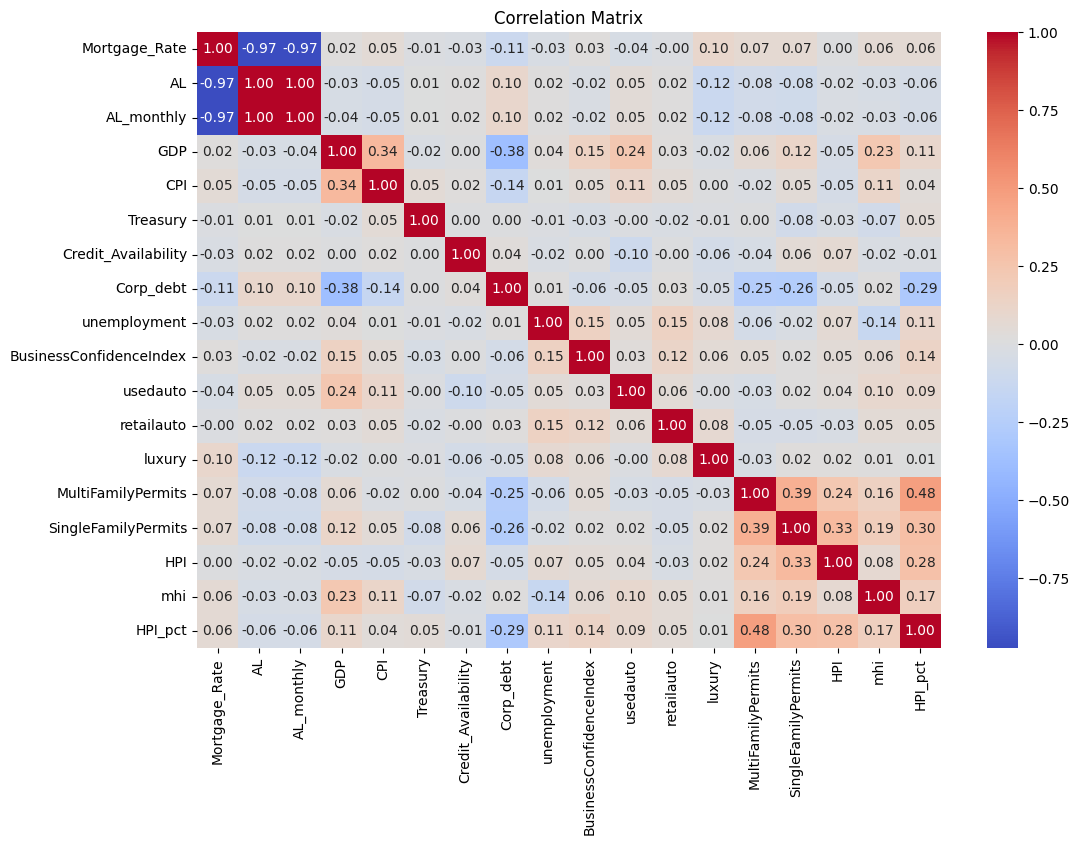

In [32]:
# denver
corr_matrix_denver = df_temp_denver.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_denver, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

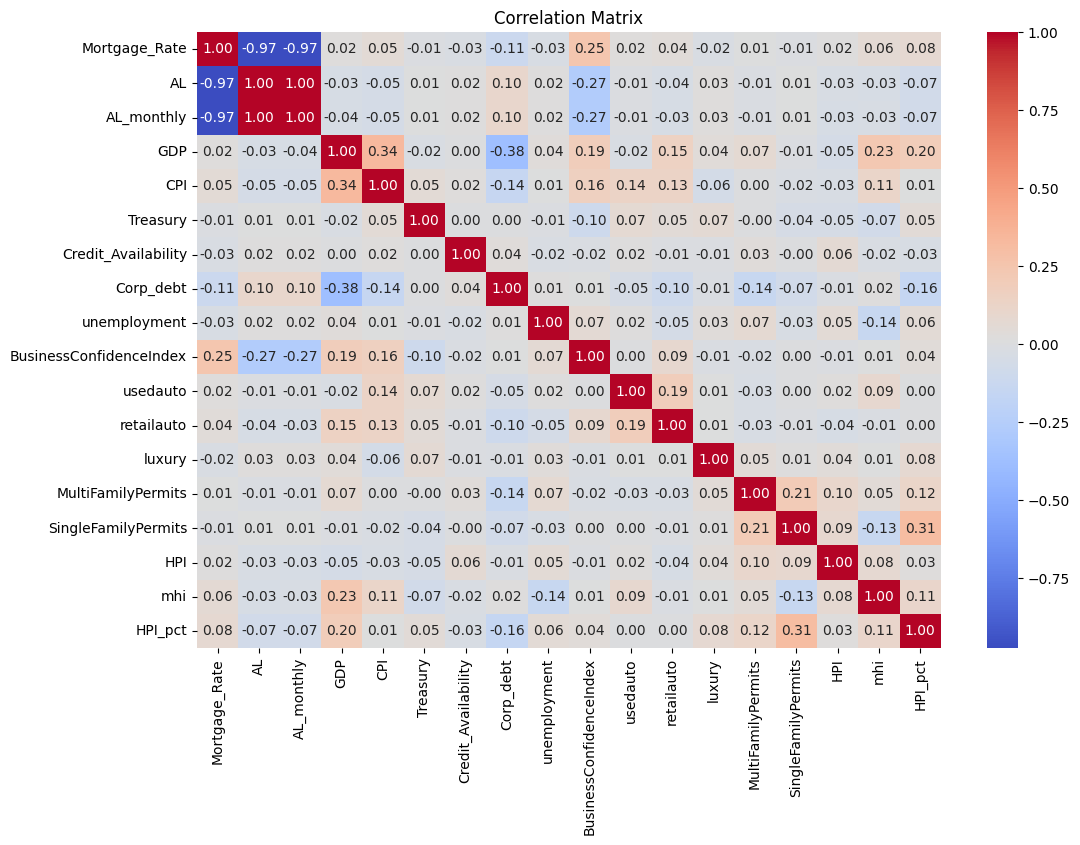

In [33]:
# san diego
corr_matrix_sd = df_temp_sd.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_sd, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Regime detection & Model fitting
> First use PCA, Ledoit-Wolf Shrinkage, OAS to regularize the input dataset
- PCA: reduce the dimensionality of the dataset, if necessary, to address multicollinearity and improve computational efficiency.

- Ledoit-Wolf Shrinkage: This method help ensure the covariance matrix is positive definite and less sensitive to noise.

- OAS: if shrinkage methods alone do not suffice, additional regularization is applied by adding a small value to the diagonal elements of the covariance matrix, further ensuring its positive definiteness.

> Next, model fitting and getting regimes
- Get top 3 models for each city

> Then, visualize regimes

> Finally, get feature importance score

#### Dallas

In [34]:
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
from scipy.linalg import cholesky
from sklearn.decomposition import PCA
from sklearn.covariance import LedoitWolf, OAS
from sklearn.preprocessing import StandardScaler

min_features = 1
max_features = 3
model_results = []

scaler = StandardScaler()

for count in range(min_features, max_features + 1):
    for combination in list(combinations(cols_high_corr_with_hpi_dallas, count)):
        cols_list = ['HPI'] + list(combination)
        model_df = df_temp_dallas[cols_list].iloc[1:].dropna()
        model_df.index = pd.to_datetime(model_df.index)

        # Standardize the values
        model_df_values = scaler.fit_transform(model_df)

        # Apply Ledoit-Wolf shrinkage
        lw = LedoitWolf()
        cov_matrix_lw = lw.fit(model_df_values).covariance_

        # Apply OAS shrinkage
        oas = OAS()
        cov_matrix_oas = oas.fit(model_df_values).covariance_

        # Check if either covariance matrix is positive definite
        cov_matrix = None
        try:
            cholesky(cov_matrix_lw)
            cov_matrix = cov_matrix_lw
        except LinAlgError:
            try:
                cholesky(cov_matrix_oas)
                cov_matrix = cov_matrix_oas
            except LinAlgError:
                print(f"Combination {cols_list} has a non-positive definite covariance matrix with both shrinkage methods.")

        # If neither method works, apply increased regularization iteratively
        if cov_matrix is None:
            regularization_values = [1e-4, 1e-3, 1e-2, 1e-1]
            for reg_value in regularization_values:
                cov_matrix = np.cov(model_df_values.T) + np.eye(model_df_values.shape[1]) * reg_value
                try:
                    cholesky(cov_matrix)
                    break
                except LinAlgError:
                    cov_matrix = None
                    print(f"Regularization with value {reg_value} failed for combination {cols_list}.")
            if cov_matrix is None:
                print(f"Combination {cols_list} cannot be regularized to a positive definite covariance matrix.")
                continue

        # Fit the HMM model
        try:
            hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000).fit(model_df_values)
            score = hmm_model.score(model_df_values)
            model_results.append([cols_list, score])
        except Exception as e:
            print(f"Model fitting failed for combination {cols_list}: {e}")
            continue

print("Model Results:\n", model_results)

Model Results:
 [[['HPI', 'HPI_pct'], -751.0570224744284], [['HPI', 'mhi'], -743.2032863194747], [['HPI', 'SingleFamilyPermits'], -272.1163179538598], [['HPI', 'Credit_Availability'], -165.96172656324438], [['HPI', 'unemployment'], -290.71104175544957], [['HPI', 'HPI_pct', 'mhi'], -956.4065891433396], [['HPI', 'HPI_pct', 'SingleFamilyPermits'], -733.5214868041095], [['HPI', 'HPI_pct', 'Credit_Availability'], -615.1285983987959], [['HPI', 'HPI_pct', 'unemployment'], -714.6696159560921], [['HPI', 'mhi', 'SingleFamilyPermits'], -947.0242096283387], [['HPI', 'mhi', 'Credit_Availability'], -435.0301601044094], [['HPI', 'mhi', 'unemployment'], -720.7518397778588], [['HPI', 'SingleFamilyPermits', 'Credit_Availability'], -601.526971151543], [['HPI', 'SingleFamilyPermits', 'unemployment'], -633.2735090308367], [['HPI', 'Credit_Availability', 'unemployment'], -243.39512427431399], [['HPI', 'HPI_pct', 'mhi', 'SingleFamilyPermits'], -1218.2518831909506], [['HPI', 'HPI_pct', 'mhi', 'Credit_Availabi

Get Top 3 Feature Sets

In [35]:
model_results.sort(key = lambda x: x[:][1])

In [36]:
top_3_models = model_results[-3:]

Plot Top 3 Models

Features -> ['HPI', 'SingleFamilyPermits']
Score -> -23090470.527821384
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-01-01', '1986-02-01',
               '1986-03-01', '1986-04-01', '1986-05-01', '1986-06-01',
               '1986-07-01', '1986-08-01',
               ...
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
               '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)
DatetimeIndex(['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-

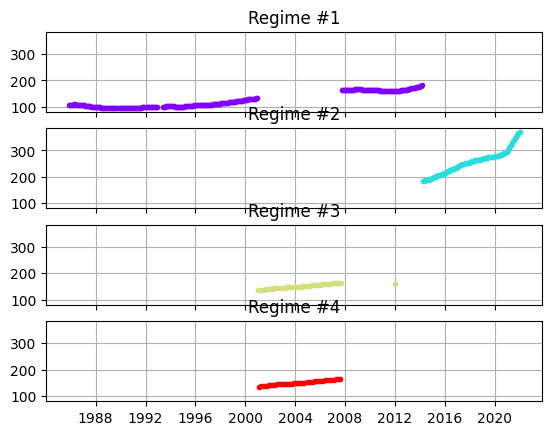

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'Credit_Availability', 'unemployment']
Score -> -4316.958385119134
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-01-01', '1986-03-01',
               '1986-04-01', '1986-05-01', '1986-06-01', '1986-07-01',
               '1986-08-01', '1986-09-01',
               ...
               '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)
DatetimeIndex(['1986-02-01', '1986-12-01', '1994-10-01', '2013-03-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06

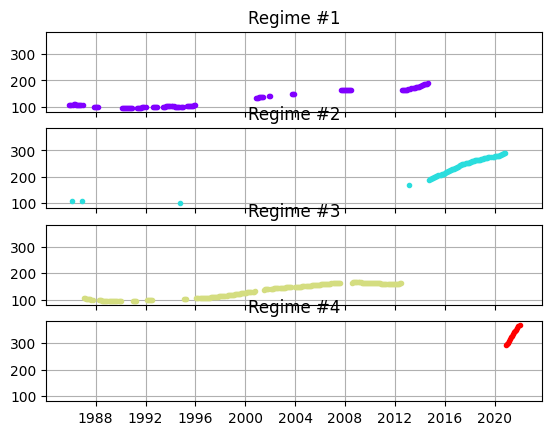

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'Credit_Availability']
Score -> -1619.9695914889862
DatetimeIndex(['2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
               '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01',
               '2002-02-01', '2002-03-01',
               ...
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01'],
              dtype='datetime64[ns]', name='Date', length=127, freq=None)
DatetimeIndex(['1986-02-01', '1986-10-01', '1986-12-01', '1992-12-01',
               '1994-10-01', '1995-01-01', '2000-12-01', '2001-05-01',
               '2008-06-01', '2012-11-01', '2013-03-01', '2014-10-01',
               '2015-01-01', '2015-06-01', '2017-09-01', '2018-07-01',
               '2019-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-01-01', '1986-03-01',
               '1

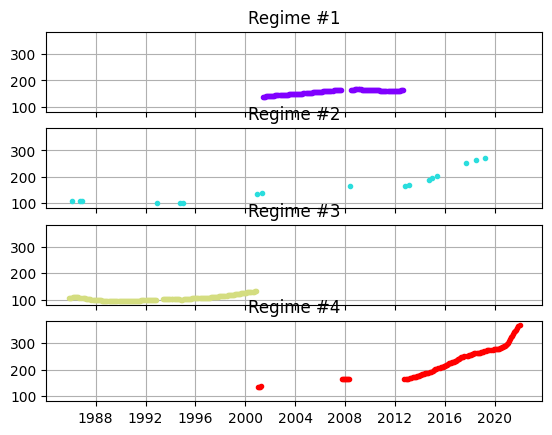

<Figure size 20000x20000 with 0 Axes>

In [37]:
regimes = []
for j, result in enumerate(top_3_models):
  print(f'Features -> {result[0]}')
  print(f'Score -> {hmm_model.score(model_df.values)}')
  model_df = df_temp_dallas[result[0]].iloc[1:].dropna()
  model_df.index = pd.to_datetime(model_df.index)
  hmm_model = GaussianHMM(
      n_components=4, covariance_type="full", n_iter=1000
  ).fit(model_df.values)
  hidden_states = hmm_model.predict(model_df.values)

  fig, axs = plt.subplots(
      hmm_model.n_components,
      sharex=True, sharey=True
  )
  colours = cm.rainbow(
      np.linspace(0, 1, hmm_model.n_components)
  )
  for i, (ax, colour) in enumerate(zip(axs, colours)):
      mask = hidden_states == i
      print(model_df.index[mask])
      if j == 0:
        regimes.append(model_df.index[mask])
      ax.plot_date(
          model_df.index[mask],
          model_df['HPI'].values[mask],
          ".", linestyle='none',
          c=colour
      )
      ax.set_title("Regime #%s" % str(i+1))
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      ax.grid(True)

  plt.figure(figsize=(200,200))
  plt.show()

print the dates for each regime

In [38]:
# Iterate over the regimes list and print each DatetimeIndex separately
for idx, regime_dates in enumerate(regimes):
    print(f"Regime {idx+1} dates:")
    print(regime_dates)

Regime 1 dates:
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-01-01', '1986-02-01',
               '1986-03-01', '1986-04-01', '1986-05-01', '1986-06-01',
               '1986-07-01', '1986-08-01',
               ...
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
               '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)
Regime 2 dates:
DatetimeIndex(['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
       

In [39]:
if len(regimes) >= 5:
    regime5 = df_temp_dallas.loc[regimes[4]]
else:
    print("There are fewer than 5 regimes detected.")

There are fewer than 5 regimes detected.


Visualize model results

In [40]:
regime1 = df_temp_dallas.loc[regimes[0]]
regime2 = df_temp_dallas.loc[regimes[1]]
regime3 = df_temp_dallas.loc[regimes[2]]
regime4 = df_temp_dallas.loc[regimes[3]]

In [41]:
n = 8
data_index = df_temp_dallas.corr()['HPI'].sort_values(ascending=False).index[1:n+1]
data = regime1[data_index]
data.corr().style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,HPI_pct,mhi,SingleFamilyPermits,Credit_Availability,unemployment,usedauto,MultiFamilyPermits,BusinessConfidenceIndex
HPI_pct,1.000000,-0.007260,0.294853,-0.073820,-0.039676,-0.025915,0.262962,-0.294124
mhi,-0.007260,1.000000,0.155298,-0.048759,-0.049468,0.003144,0.094142,-0.019887
SingleFamilyPermits,0.294853,0.155298,1.000000,0.024367,-0.140377,0.076750,0.317281,0.008697
Credit_Availability,-0.073820,-0.048759,0.024367,1.000000,-0.037632,0.028932,0.031444,-0.040320
unemployment,-0.039676,-0.049468,-0.140377,-0.037632,1.000000,-0.146300,-0.059979,0.134149
usedauto,-0.025915,0.003144,0.076750,0.028932,-0.146300,1.000000,-0.054549,0.011838
MultiFamilyPermits,0.262962,0.094142,0.317281,0.031444,-0.059979,-0.054549,1.000000,-0.040008
BusinessConfidenceIndex,-0.294124,-0.019887,0.008697,-0.040320,0.134149,0.011838,-0.040008,1.000000


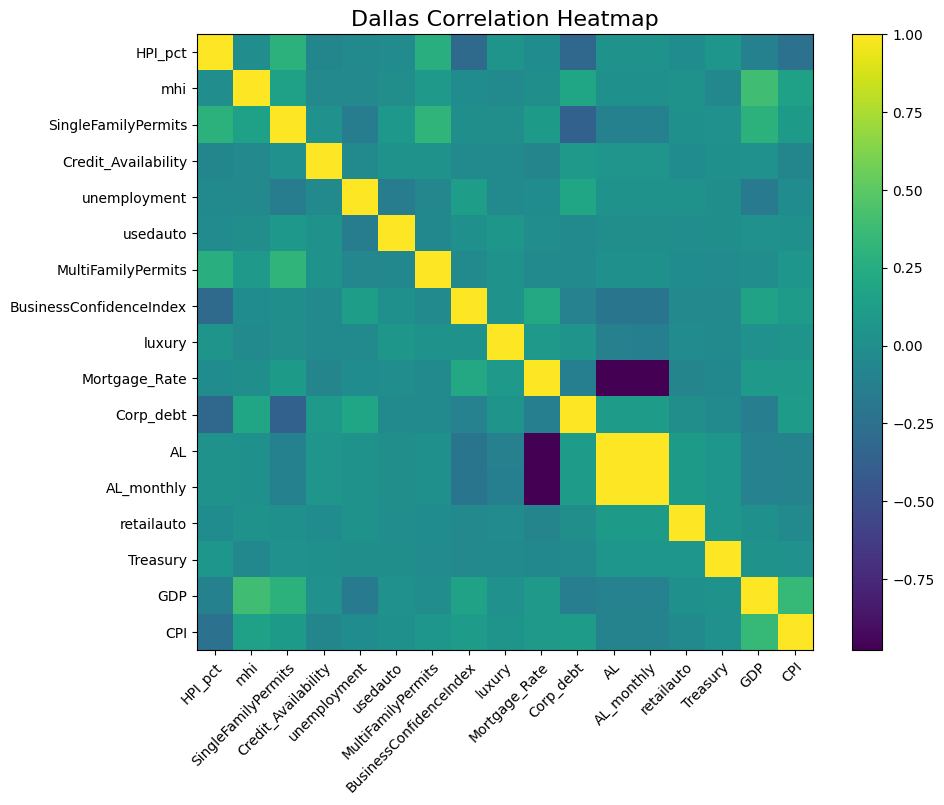

In [42]:
data_index = df_temp_dallas.corr()['HPI'].sort_values(ascending=False).index[1:]
data = regime1[data_index]
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap='viridis')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels font size
ax.set_xticks(range(len(data_index)))
ax.set_yticks(range(len(data_index)))
ax.set_xticklabels(data_index, fontsize=10)
ax.set_yticklabels(data_index, fontsize=10)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set title
ax.set_title('Dallas Correlation Heatmap', fontsize=16)

# Save figure as a PNG image
plt.savefig('dallas_heatmap.png', dpi=300, bbox_inches='tight')

In [43]:
data = regime1[data_index]
data.columns

Index(['HPI_pct', 'mhi', 'SingleFamilyPermits', 'Credit_Availability',
       'unemployment', 'usedauto', 'MultiFamilyPermits',
       'BusinessConfidenceIndex', 'luxury', 'Mortgage_Rate', 'Corp_debt', 'AL',
       'AL_monthly', 'retailauto', 'Treasury', 'GDP', 'CPI'],
      dtype='object')

Get Feature Importance Scores

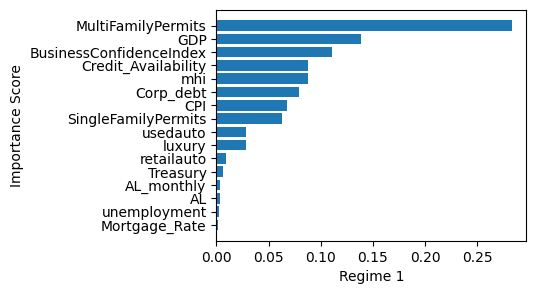

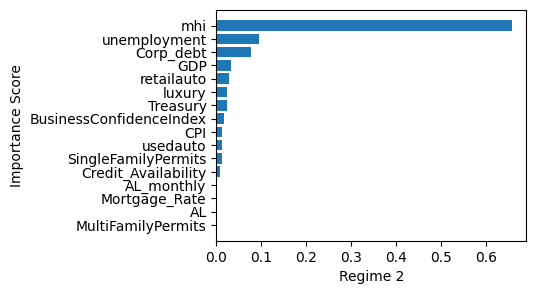

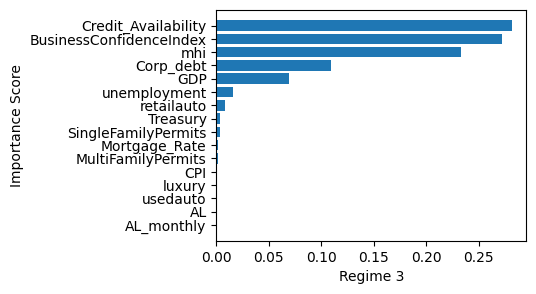

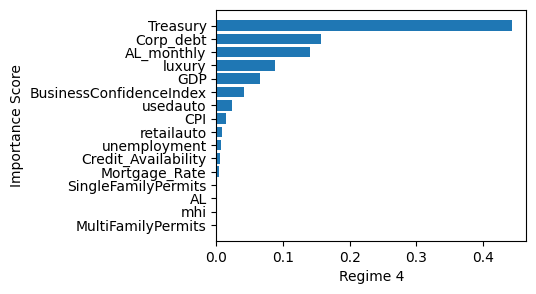

In [44]:
from sklearn.tree import DecisionTreeRegressor

data_index = df_temp_dallas.corr()['HPI'].sort_values(ascending=False).index

for i in range(4):
    data = dallas_data.loc[regimes[i]]
    y = data[['HPI_pct']]
    X = data.drop(['HPI', 'HPI_pct'], axis =1)

    # Train a decision tree model on the entire dataset
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importance
    feature_importance = model.feature_importances_

    # Visualize the results
    f_i = list(zip(model.feature_names_in_, model.feature_importances_))
    f_i.sort(key = lambda x : x[1])
    plt.figure(figsize=(4, 3))
    plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
    plt.xlabel("Regime " + str(i+1))
    plt.ylabel("Importance Score")
    plt.show();

Dallas, highly correlated features: bci, credit, gdp, mhi, permits, corp debt, treasury

In [ ]:
# dallas_data.to_csv('dallas_data.csv', index=False)

In [45]:
# dallas = pd.read_csv('dallas_data.csv')
# dallas.set_index('Date',inplace=True)
dallas_new = dallas_data[['BusinessConfidenceIndex',
                          'Credit_Availability',
                          'GDP',
                          'Corp_debt',
                          'Treasury',
                          'mhi',
                          'HPI',
                          'MultiFamilyPermits']]

#### Miami

In [46]:
# Miami, try different combinations of features
min_features = 1
max_features = 3
model_results = []

scaler = StandardScaler()

for count in range(min_features, max_features + 1):
    for combination in list(combinations(cols_high_corr_with_hpi_miami, count)):
        cols_list = ['HPI'] + list(combination)
        model_df = df_temp_miami[cols_list].iloc[1:].dropna()
        model_df.index = pd.to_datetime(model_df.index)

        # Standardize the values
        model_df_values = scaler.fit_transform(model_df)

        # Apply Ledoit-Wolf shrinkage
        lw = LedoitWolf()
        cov_matrix_lw = lw.fit(model_df_values).covariance_

        # Apply OAS shrinkage
        oas = OAS()
        cov_matrix_oas = oas.fit(model_df_values).covariance_

        # Check if either covariance matrix is positive definite
        cov_matrix = None
        try:
            cholesky(cov_matrix_lw)
            cov_matrix = cov_matrix_lw
        except LinAlgError:
            try:
                cholesky(cov_matrix_oas)
                cov_matrix = cov_matrix_oas
            except LinAlgError:
                print(f"Combination {cols_list} has a non-positive definite covariance matrix with both shrinkage methods.")

        # If neither method works, apply increased regularization iteratively
        if cov_matrix is None:
            regularization_values = [1e-4, 1e-3, 1e-2, 1e-1]
            for reg_value in regularization_values:
                cov_matrix = np.cov(model_df_values.T) + np.eye(model_df_values.shape[1]) * reg_value
                try:
                    cholesky(cov_matrix)
                    break
                except LinAlgError:
                    cov_matrix = None
                    print(f"Regularization with value {reg_value} failed for combination {cols_list}.")
            if cov_matrix is None:
                print(f"Combination {cols_list} cannot be regularized to a positive definite covariance matrix.")
                continue

        # Fit the HMM model
        try:
            hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000).fit(model_df_values)
            score = hmm_model.score(model_df_values)
            model_results.append([cols_list, score])
        except Exception as e:
            print(f"Model fitting failed for combination {cols_list}: {e}")
            continue

print("Model Results:\n", model_results)

Model Results:
 [[['HPI', 'MultiFamilyPermits'], -445.1980791927479], [['HPI', 'SingleFamilyPermits'], -196.53469697460767], [['HPI', 'HPI_pct'], -590.2392897565599], [['HPI', 'mhi'], -492.16430204841265], [['HPI', 'Credit_Availability'], -128.2880089992868], [['HPI', 'MultiFamilyPermits', 'SingleFamilyPermits'], -443.27252201395777], [['HPI', 'MultiFamilyPermits', 'HPI_pct'], -866.2928848456831], [['HPI', 'MultiFamilyPermits', 'mhi'], -857.1931343543669], [['HPI', 'MultiFamilyPermits', 'Credit_Availability'], -453.83224040802645], [['HPI', 'SingleFamilyPermits', 'HPI_pct'], -470.6420067482313], [['HPI', 'SingleFamilyPermits', 'mhi'], -563.0299766331252], [['HPI', 'SingleFamilyPermits', 'Credit_Availability'], -260.94029732192024], [['HPI', 'HPI_pct', 'mhi'], -1000.8055617978639], [['HPI', 'HPI_pct', 'Credit_Availability'], -722.2237283309557], [['HPI', 'mhi', 'Credit_Availability'], -492.63556425637364], [['HPI', 'MultiFamilyPermits', 'SingleFamilyPermits', 'HPI_pct'], -1346.458396892

In [47]:
model_results.sort(key = lambda x: x[:][1])

In [48]:
miami_top_3_models = model_results[-3:]

Features -> ['HPI', 'SingleFamilyPermits', 'Credit_Availability']
Score -> -19312065.316317897
DatetimeIndex(['1985-03-01', '1986-02-01', '1986-10-01', '1986-12-01',
               '1992-12-01', '1994-10-01', '1995-01-01', '2000-11-01',
               '2000-12-01', '2008-06-01', '2012-11-01', '2013-03-01',
               '2014-10-01', '2015-01-01', '2015-06-01', '2017-09-01',
               '2018-07-01', '2019-04-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2001-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Date', length=170, freq=None)
DatetimeIndex(['2001-02-01', '2001-03

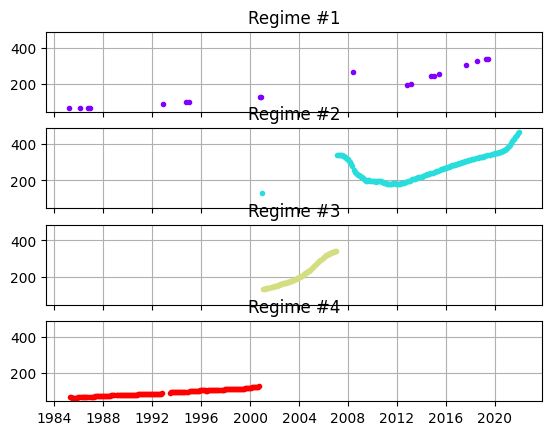

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'SingleFamilyPermits']
Score -> -4926.1773860250705
DatetimeIndex(['1985-03-01', '1985-04-01', '1985-05-01', '1985-06-01',
               '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
               '1985-11-01', '1985-12-01',
               ...
               '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', name='Date', length=182, freq=None)
DatetimeIndex(['2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01',
               '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
               '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01',
               '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01',
               '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01',
               '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01',
               '2003-02-01', '2003-03-

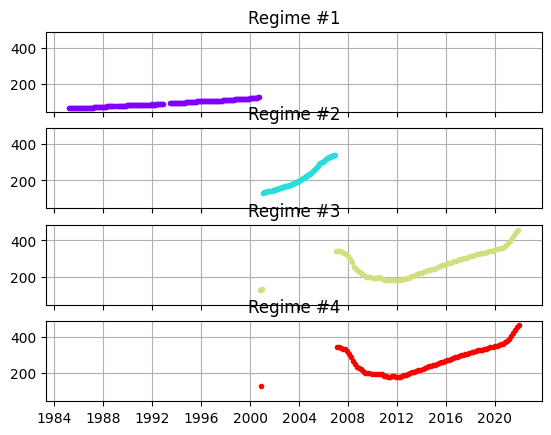

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'Credit_Availability']
Score -> -4431.592276375516
DatetimeIndex(['2007-12-01', '2008-01-01', '2008-04-01', '2008-05-01',
               '2008-06-01', '2012-11-01', '2012-12-01', '2013-03-01',
               '2014-04-01', '2014-05-01', '2014-09-01', '2014-10-01',
               '2014-12-01', '2015-01-01', '2015-05-01', '2015-06-01',
               '2017-09-01', '2018-07-01', '2018-10-01', '2018-11-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['1988-05-01', '1988-06-01', '1988-07-01', '1988-08-01',
               '1988-09-01', '1988-10-01', '1988-11-01', '1988-12-01',
               '1989-02-01', '1989-03-01',
               ...
               '2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01'],
              dtype='datetime64[ns]', name='Date',

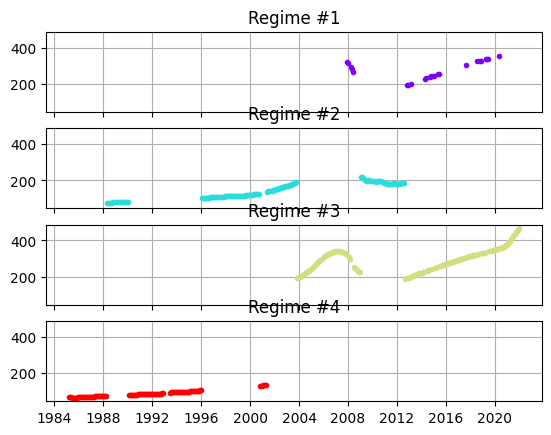

<Figure size 20000x20000 with 0 Axes>

In [49]:
regimes = []
for j, result in enumerate(miami_top_3_models):
  print(f'Features -> {result[0]}')
  print(f'Score -> {hmm_model.score(model_df.values)}')
  model_df = df_temp_miami[result[0]].iloc[1:].dropna()
  model_df.index = pd.to_datetime(model_df.index)
  hmm_model = GaussianHMM(
      n_components=4, covariance_type="full", n_iter=1000
  ).fit(model_df.values)
  hidden_states = hmm_model.predict(model_df.values)

  fig, axs = plt.subplots(
      hmm_model.n_components,
      sharex=True, sharey=True
  )
  colours = cm.rainbow(
      np.linspace(0, 1, hmm_model.n_components)
  )
  for i, (ax, colour) in enumerate(zip(axs, colours)):
      mask = hidden_states == i
      print(model_df.index[mask])
      if j == 0:
        regimes.append(model_df.index[mask])
      ax.plot_date(
          model_df.index[mask],
          model_df['HPI'].values[mask],
          ".", linestyle='none',
          c=colour
      )
      ax.set_title("Regime #%s" % str(i+1))
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      ax.grid(True)

  plt.figure(figsize=(200,200))
  plt.show()

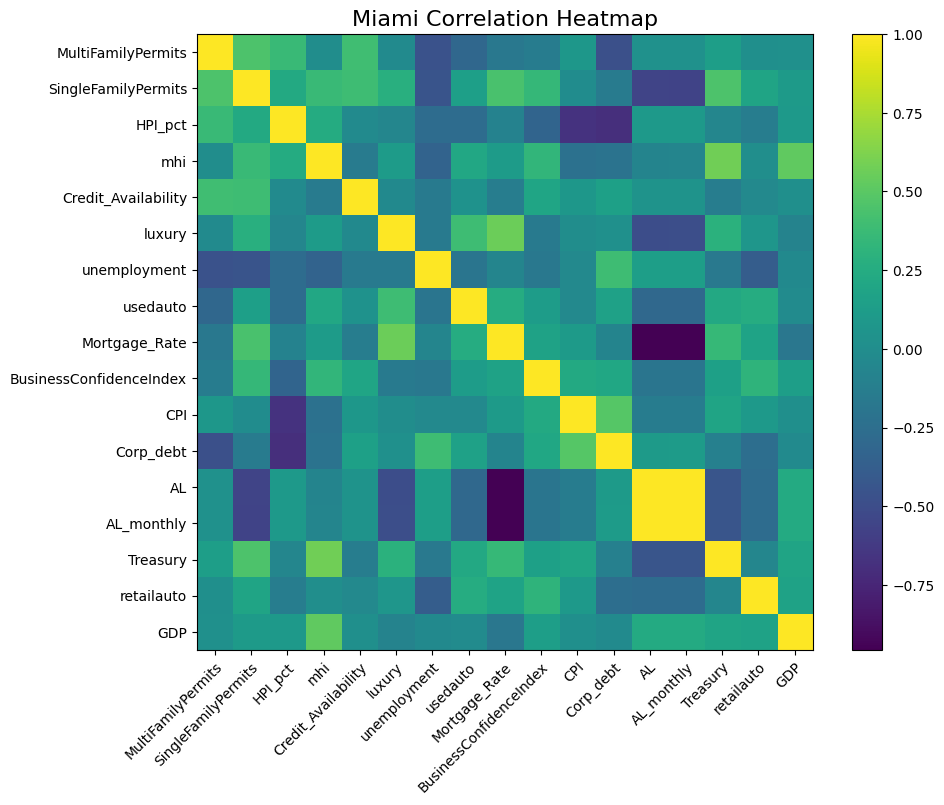

In [50]:
regime1 = df_temp_miami.loc[regimes[0]]
regime2 = df_temp_miami.loc[regimes[1]]
regime3 = df_temp_miami.loc[regimes[2]]
regime4 = df_temp_miami.loc[regimes[3]]

n = 8
data_index = df_temp_miami.corr()['HPI'].sort_values(ascending=False).index[1:n+1]
data = regime1[data_index]
data.corr().style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

data_index = df_temp_miami.corr()['HPI'].sort_values(ascending=False).index[1:]
data = regime1[data_index]
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap='viridis')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels font size
ax.set_xticks(range(len(data_index)))
ax.set_yticks(range(len(data_index)))
ax.set_xticklabels(data_index, fontsize=10)
ax.set_yticklabels(data_index, fontsize=10)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set title
ax.set_title('Miami Correlation Heatmap', fontsize=16)

# Save figure as a PNG image
plt.savefig('miami_heatmap.png', dpi=300, bbox_inches='tight')

Get Feature Importance score for Miami

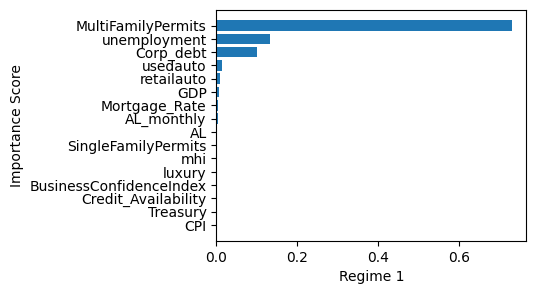

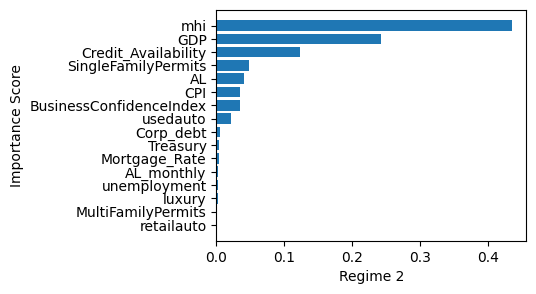

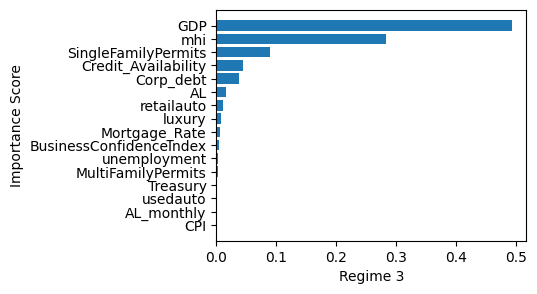

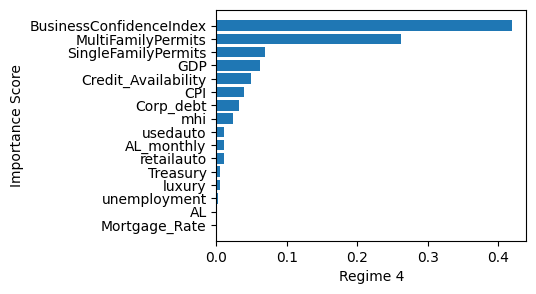

In [51]:
data_index = df_temp_miami.corr()['HPI'].sort_values(ascending=False).index

for i in range(4):
    data = miami_data.loc[regimes[i]]
    y = data[['HPI_pct']]
    X = data.drop(['HPI', 'HPI_pct'], axis =1)

    # Train a decision tree model on the entire dataset
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importance
    feature_importance = model.feature_importances_

    # Visualize the results
    f_i = list(zip(model.feature_names_in_, model.feature_importances_))
    f_i.sort(key = lambda x : x[1])
    plt.figure(figsize=(4, 3))
    plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
    plt.xlabel("Regime " + str(i+1))
    plt.ylabel("Importance Score")
    plt.show();

Miami, highly correlated features: GDP, mhi, usedauto, bci, corp debt

In [ ]:
# miami_data.to_csv('miami_data.csv', index=False)

In [52]:
#miami = pd.read_csv('miami_data.csv')
#dallas.set_index('Date',inplace=True)
miami_new = miami_data[['GDP','mhi','BusinessConfidenceIndex','unemployment','Corp_debt','HPI', 'MultiFamilyPermits']]

#### Denver

In [53]:
# Denver, find best combination of features
min_features = 1
max_features = 3
model_results = []

scaler = StandardScaler()

for count in range(min_features, max_features + 1):
    for combination in list(combinations(cols_high_corr_with_hpi_denver, count)):
        cols_list = ['HPI'] + list(combination)
        model_df = df_temp_denver[cols_list].iloc[1:].dropna()
        model_df.index = pd.to_datetime(model_df.index)

        # Standardize the values
        model_df_values = scaler.fit_transform(model_df)

        # Apply Ledoit-Wolf shrinkage
        lw = LedoitWolf()
        cov_matrix_lw = lw.fit(model_df_values).covariance_

        # Apply OAS shrinkage
        oas = OAS()
        cov_matrix_oas = oas.fit(model_df_values).covariance_

        # Check if either covariance matrix is positive definite
        cov_matrix = None
        try:
            cholesky(cov_matrix_lw)
            cov_matrix = cov_matrix_lw
        except LinAlgError:
            try:
                cholesky(cov_matrix_oas)
                cov_matrix = cov_matrix_oas
            except LinAlgError:
                print(f"Combination {cols_list} has a non-positive definite covariance matrix with both shrinkage methods.")

        # If neither method works, apply increased regularization iteratively
        if cov_matrix is None:
            regularization_values = [1e-4, 1e-3, 1e-2, 1e-1]
            for reg_value in regularization_values:
                cov_matrix = np.cov(model_df_values.T) + np.eye(model_df_values.shape[1]) * reg_value
                try:
                    cholesky(cov_matrix)
                    break
                except LinAlgError:
                    cov_matrix = None
                    print(f"Regularization with value {reg_value} failed for combination {cols_list}.")
            if cov_matrix is None:
                print(f"Combination {cols_list} cannot be regularized to a positive definite covariance matrix.")
                continue

        # Fit the HMM model
        try:
            hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000).fit(model_df_values)
            score = hmm_model.score(model_df_values)
            model_results.append([cols_list, score])
        except Exception as e:
            print(f"Model fitting failed for combination {cols_list}: {e}")
            continue

print("Model Results:\n", model_results)

Model Results:
 [[['HPI', 'SingleFamilyPermits'], -455.88118191420836], [['HPI', 'HPI_pct'], -880.6572137876037], [['HPI', 'MultiFamilyPermits'], -220.21873716082916], [['HPI', 'mhi'], -687.883823885996], [['HPI', 'Credit_Availability'], -197.82583271545386], [['HPI', 'SingleFamilyPermits', 'HPI_pct'], -1167.4334624251787], [['HPI', 'SingleFamilyPermits', 'MultiFamilyPermits'], -835.7938412721907], [['HPI', 'SingleFamilyPermits', 'mhi'], -1073.2637366766942], [['HPI', 'SingleFamilyPermits', 'Credit_Availability'], -607.4335480336346], [['HPI', 'HPI_pct', 'MultiFamilyPermits'], -792.1147645657051], [['HPI', 'HPI_pct', 'mhi'], -867.2611364599136], [['HPI', 'HPI_pct', 'Credit_Availability'], -640.6309529355614], [['HPI', 'MultiFamilyPermits', 'mhi'], -689.7931477599036], [['HPI', 'MultiFamilyPermits', 'Credit_Availability'], -638.7462970146765], [['HPI', 'mhi', 'Credit_Availability'], -560.6949781684166], [['HPI', 'SingleFamilyPermits', 'HPI_pct', 'MultiFamilyPermits'], -1122.033190741687

In [54]:
model_results.sort(key = lambda x: x[:][1])

In [55]:
denver_top_3_models = model_results[-3:]

Features -> ['HPI', 'SingleFamilyPermits']
Score -> -43045698.289050266
DatetimeIndex(['2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
     

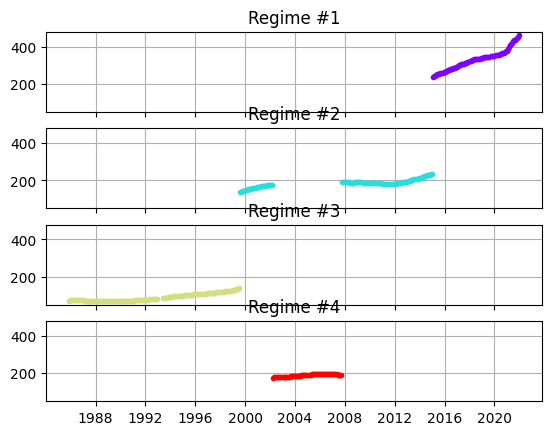

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'MultiFamilyPermits']
Score -> -4315.432319024118
DatetimeIndex(['1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-11-01', '1998-12-01', '1999-01-01', '1999-02-01',
               '1999-03-01', '1999-04-01', '1999-05-01', '1999-06-01',
               '1999-07-01', '1999-08-01', '1999-09-01', '1999-10-01',
               '1999-11-01', '1999-12-01', '2000-01-01', '2000-02-01',
               '2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01',
               '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
               '2000-11-01', '2000-12-01', '2001-01-01', '2001-02-01',
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
       

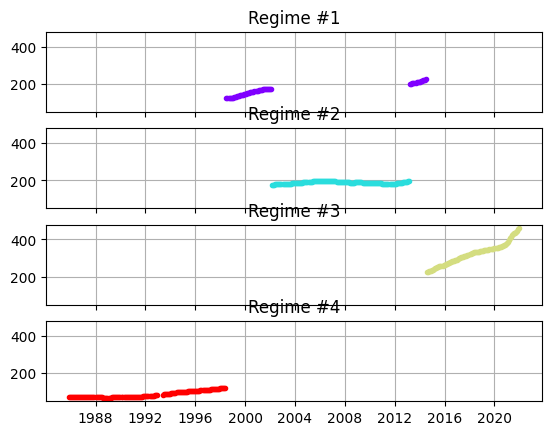

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'Credit_Availability']
Score -> -4769.618719863856
DatetimeIndex(['1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01',
               '2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
               '2002-01-01', '2003-11-01', '2003-12-01', '2007-10-01',
               '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01',
               '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01',
               '2008-07-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-04-01',
      

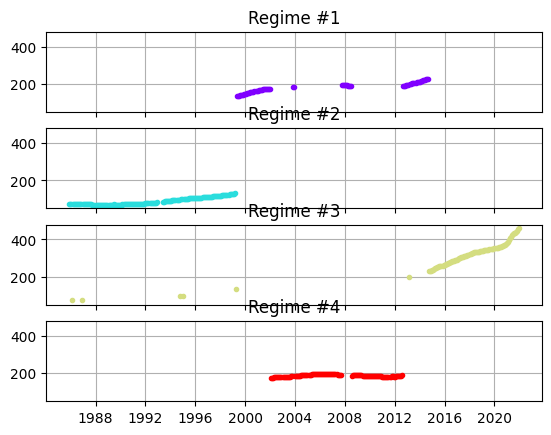

<Figure size 20000x20000 with 0 Axes>

In [56]:
regimes = []
for j, result in enumerate(denver_top_3_models):
  print(f'Features -> {result[0]}')
  print(f'Score -> {hmm_model.score(model_df.values)}')
  model_df = df_temp_denver[result[0]].iloc[1:].dropna()
  model_df.index = pd.to_datetime(model_df.index)
  hmm_model = GaussianHMM(
      n_components=4, covariance_type="full", n_iter=1000
  ).fit(model_df.values)
  hidden_states = hmm_model.predict(model_df.values)

  fig, axs = plt.subplots(
      hmm_model.n_components,
      sharex=True, sharey=True
  )
  colours = cm.rainbow(
      np.linspace(0, 1, hmm_model.n_components)
  )
  for i, (ax, colour) in enumerate(zip(axs, colours)):
      mask = hidden_states == i
      print(model_df.index[mask])
      if j == 0:
        regimes.append(model_df.index[mask])
      ax.plot_date(
          model_df.index[mask],
          model_df['HPI'].values[mask],
          ".", linestyle='none',
          c=colour
      )
      ax.set_title("Regime #%s" % str(i+1))
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      ax.grid(True)

  plt.figure(figsize=(200,200))
  plt.show()

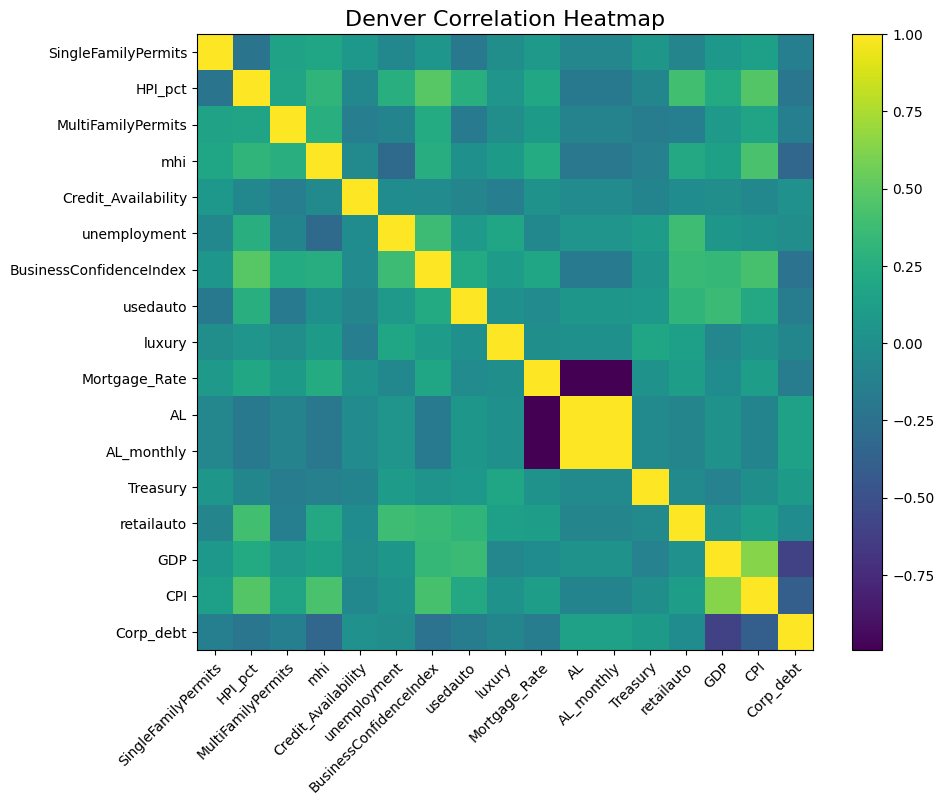

In [57]:
regime1 = df_temp_denver.loc[regimes[0]]
regime2 = df_temp_denver.loc[regimes[1]]
regime3 = df_temp_denver.loc[regimes[2]]
regime4 = df_temp_denver.loc[regimes[3]]

n = 8
data_index = df_temp_denver.corr()['HPI'].sort_values(ascending=False).index[1:n+1]
data = regime1[data_index]
data.corr().style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

data_index = df_temp_denver.corr()['HPI'].sort_values(ascending=False).index[1:]
data = regime1[data_index]
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap='viridis')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels font size
ax.set_xticks(range(len(data_index)))
ax.set_yticks(range(len(data_index)))
ax.set_xticklabels(data_index, fontsize=10)
ax.set_yticklabels(data_index, fontsize=10)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set title
ax.set_title('Denver Correlation Heatmap', fontsize=16)

# Save figure as a PNG image
plt.savefig('denver_heatmap.png', dpi=300, bbox_inches='tight')

Get Feature Importance Score for Denver

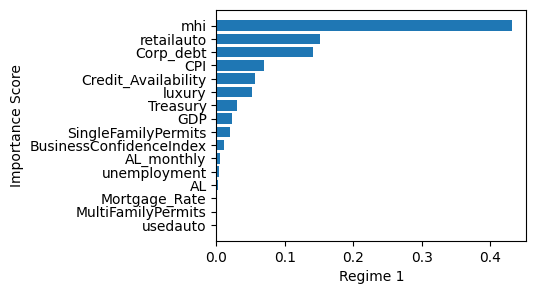

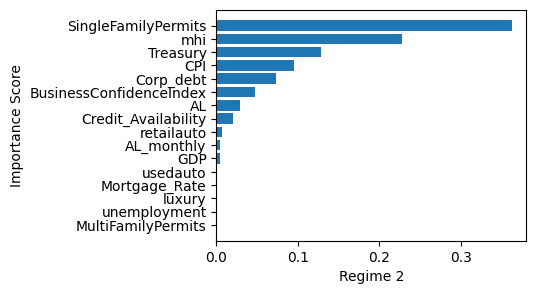

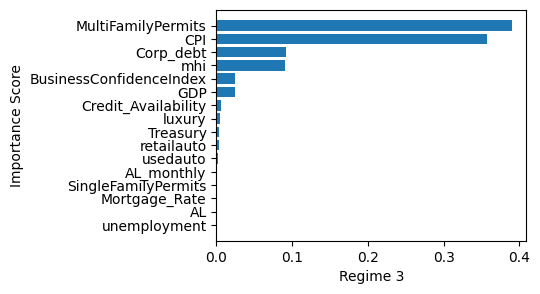

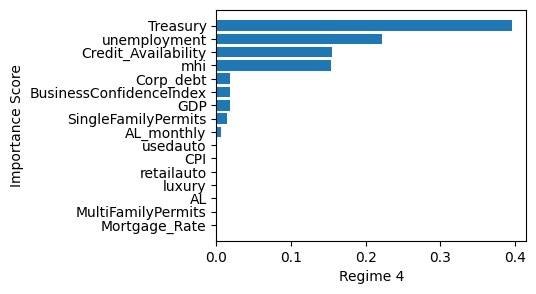

In [58]:
data_index = df_temp_denver.corr()['HPI'].sort_values(ascending=False).index

for i in range(4):
    data = denver_data.loc[regimes[i]]
    y = data[['HPI_pct']]
    X = data.drop(['HPI', 'HPI_pct'], axis =1)

    # Train a decision tree model on the entire dataset
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importance
    feature_importance = model.feature_importances_

    # Visualize the results
    f_i = list(zip(model.feature_names_in_, model.feature_importances_))
    f_i.sort(key = lambda x : x[1])
    plt.figure(figsize=(4, 3))
    plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
    plt.xlabel("Regime " + str(i+1))
    plt.ylabel("Importance Score")
    plt.show();

Denver, highly correlated features: permits, cpi, corp debt, mhi, retailauto

In [ ]:
#denver_data.to_csv('denver_data.csv', index=False)

In [59]:
#denver = pd.read_csv('denver_data.csv')
#dallas.set_index('Date',inplace=True)
denver_new = denver_data[['unemployment','Treasury','mhi','CPI','retailauto','SingleFamilyPermits','HPI','MultiFamilyPermits']]

#### San Diego

In [60]:
# San Diego, find best combination of features, get importance score
min_features = 1
max_features = 3
model_results = []

scaler = StandardScaler()

for count in range(min_features, max_features + 1):
    for combination in list(combinations(cols_high_corr_with_hpi_sd, count)):
        cols_list = ['HPI'] + list(combination)
        model_df = df_temp_sd[cols_list].iloc[1:].dropna()
        model_df.index = pd.to_datetime(model_df.index)

        # Standardize the values
        model_df_values = scaler.fit_transform(model_df)

        # Apply Ledoit-Wolf shrinkage
        lw = LedoitWolf()
        cov_matrix_lw = lw.fit(model_df_values).covariance_

        # Apply OAS shrinkage
        oas = OAS()
        cov_matrix_oas = oas.fit(model_df_values).covariance_

        # Check if either covariance matrix is positive definite
        cov_matrix = None
        try:
            cholesky(cov_matrix_lw)
            cov_matrix = cov_matrix_lw
        except LinAlgError:
            try:
                cholesky(cov_matrix_oas)
                cov_matrix = cov_matrix_oas
            except LinAlgError:
                print(f"Combination {cols_list} has a non-positive definite covariance matrix with both shrinkage methods.")

        # If neither method works, apply increased regularization iteratively
        if cov_matrix is None:
            regularization_values = [1e-4, 1e-3, 1e-2, 1e-1]
            for reg_value in regularization_values:
                cov_matrix = np.cov(model_df_values.T) + np.eye(model_df_values.shape[1]) * reg_value
                try:
                    cholesky(cov_matrix)
                    break
                except LinAlgError:
                    cov_matrix = None
                    print(f"Regularization with value {reg_value} failed for combination {cols_list}.")
            if cov_matrix is None:
                print(f"Combination {cols_list} cannot be regularized to a positive definite covariance matrix.")
                continue

        # Fit the HMM model
        try:
            hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000).fit(model_df_values)
            score = hmm_model.score(model_df_values)
            model_results.append([cols_list, score])
        except Exception as e:
            print(f"Model fitting failed for combination {cols_list}: {e}")
            continue

print("Model Results:\n", model_results)

Model Results:
 [[['HPI', 'MultiFamilyPermits'], -570.238156361436], [['HPI', 'SingleFamilyPermits'], -431.41466165037986], [['HPI', 'mhi'], -514.8100346719901], [['HPI', 'Credit_Availability'], -194.4062093770809], [['HPI', 'unemployment'], -110.49989239840478], [['HPI', 'MultiFamilyPermits', 'SingleFamilyPermits'], -789.1983412674407], [['HPI', 'MultiFamilyPermits', 'mhi'], -935.2637374304783], [['HPI', 'MultiFamilyPermits', 'Credit_Availability'], -682.8137998386525], [['HPI', 'MultiFamilyPermits', 'unemployment'], -735.2112010849437], [['HPI', 'SingleFamilyPermits', 'mhi'], -713.8576068951963], [['HPI', 'SingleFamilyPermits', 'Credit_Availability'], -413.8266707098344], [['HPI', 'SingleFamilyPermits', 'unemployment'], -433.5851356022184], [['HPI', 'mhi', 'Credit_Availability'], -771.2693656703057], [['HPI', 'mhi', 'unemployment'], -522.8857527031814], [['HPI', 'Credit_Availability', 'unemployment'], -314.2905890742211], [['HPI', 'MultiFamilyPermits', 'SingleFamilyPermits', 'mhi'], 

In [61]:
model_results.sort(key = lambda x: x[:][1])

In [62]:
sd_top_3_models = model_results[-3:]

Features -> ['HPI', 'Credit_Availability', 'unemployment']
Score -> -9342323.557319378
DatetimeIndex(['2003-12-01', '2004-01-01', '2004-02-01', '2004-03-01',
               '2004-04-01', '2004-05-01', '2004-06-01', '2004-07-01',
               '2004-08-01', '2004-09-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-04-01', '1986-05-01',
               '1986-06-01', '1986-07-01', '1986-08-01', '1987-02-01',
               '1987-03-01', '1987-04-01',
               ...
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01'],
              dtype='datetime64[ns]', name='Date', length=2

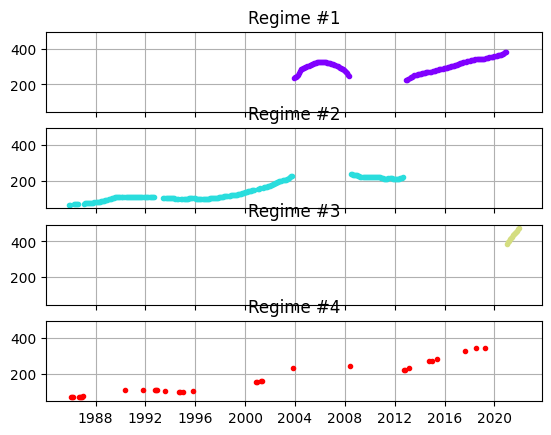

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'Credit_Availability']
Score -> -1783.0544801190379
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-04-01', '1986-05-01',
               '1986-06-01', '1986-07-01', '1986-08-01', '1987-01-01',
               '1987-02-01', '1987-03-01',
               ...
               '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', name='Date', length=160, freq=None)
DatetimeIndex(['2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
               '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01',
               '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01',
               '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01',
               '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01',
               '2003-02-01', '2003-03-01', '2003-04-01', '2003-05-01',
               '2003-06-01', '2003-07-

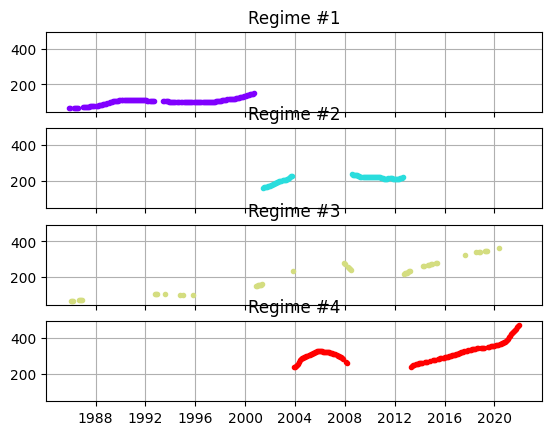

<Figure size 20000x20000 with 0 Axes>

Features -> ['HPI', 'unemployment']
Score -> -2501.65063307693
DatetimeIndex(['2000-11-01', '2000-12-01', '2001-01-01', '2001-02-01',
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='Date', length=240, freq=None)
DatetimeIndex(['1985-11-01', '1985-12-01', '1986-01-01', '1986-02-01',
               '1986-03-01', '1986-04-01', '1986-05-01', '1986-06-01',
               '1986-07-01', '1986-08-01',
               ...
               '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', name='Date', length=174, freq=None)
DatetimeI

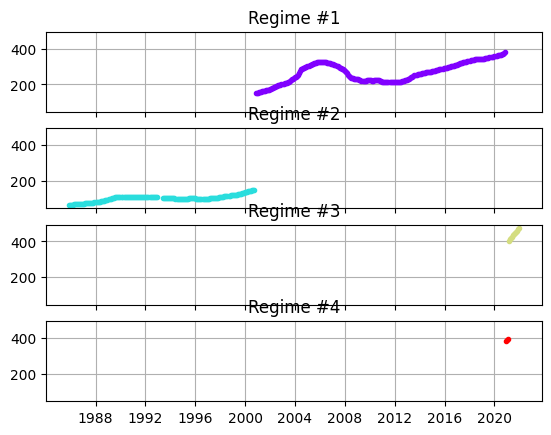

<Figure size 20000x20000 with 0 Axes>

In [63]:
regimes = []
for j, result in enumerate(sd_top_3_models):
  print(f'Features -> {result[0]}')
  print(f'Score -> {hmm_model.score(model_df.values)}')
  model_df = df_temp_sd[result[0]].iloc[1:].dropna()
  model_df.index = pd.to_datetime(model_df.index)
  hmm_model = GaussianHMM(
      n_components=4, covariance_type="full", n_iter=1000
  ).fit(model_df.values)
  hidden_states = hmm_model.predict(model_df.values)

  fig, axs = plt.subplots(
      hmm_model.n_components,
      sharex=True, sharey=True
  )
  colours = cm.rainbow(
      np.linspace(0, 1, hmm_model.n_components)
  )
  for i, (ax, colour) in enumerate(zip(axs, colours)):
      mask = hidden_states == i
      print(model_df.index[mask])
      if j == 0:
        regimes.append(model_df.index[mask])
      ax.plot_date(
          model_df.index[mask],
          model_df['HPI'].values[mask],
          ".", linestyle='none',
          c=colour
      )
      ax.set_title("Regime #%s" % str(i+1))
      ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
      ax.grid(True)

  plt.figure(figsize=(200,200))
  plt.show()

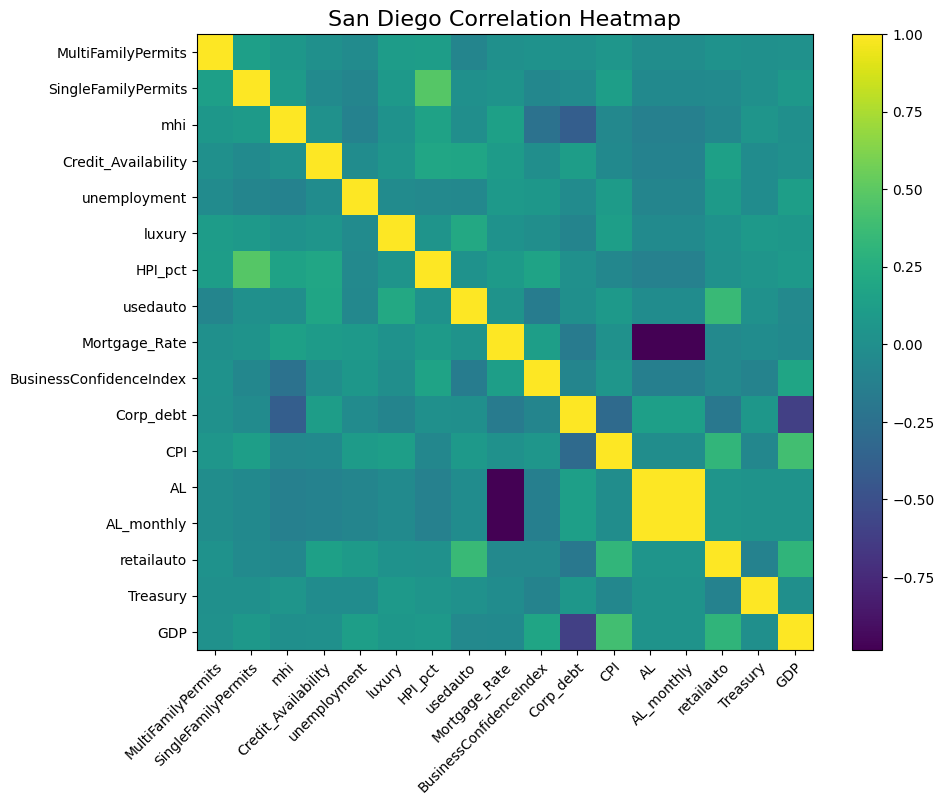

In [64]:
regime1 = df_temp_sd.loc[regimes[0]]
regime2 = df_temp_sd.loc[regimes[1]]
regime3 = df_temp_sd.loc[regimes[2]]
regime4 = df_temp_sd.loc[regimes[3]]

n = 8
data_index = df_temp_sd.corr()['HPI'].sort_values(ascending=False).index[1:n+1]
data = regime1[data_index]
data.corr().style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

data_index = df_temp_sd.corr()['HPI'].sort_values(ascending=False).index[1:]
data = regime1[data_index]
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap='viridis')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels font size
ax.set_xticks(range(len(data_index)))
ax.set_yticks(range(len(data_index)))
ax.set_xticklabels(data_index, fontsize=10)
ax.set_yticklabels(data_index, fontsize=10)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set title
ax.set_title('San Diego Correlation Heatmap', fontsize=16)

# Save figure as a PNG image
plt.savefig('sd_heatmap.png', dpi=300, bbox_inches='tight')

Get Feature Importance score for San Diego

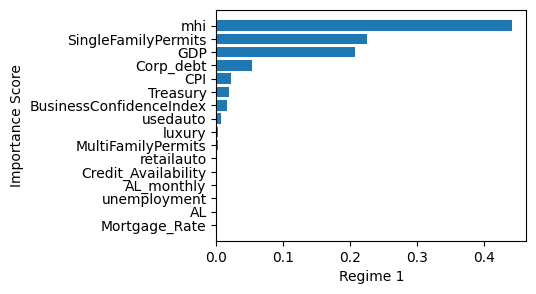

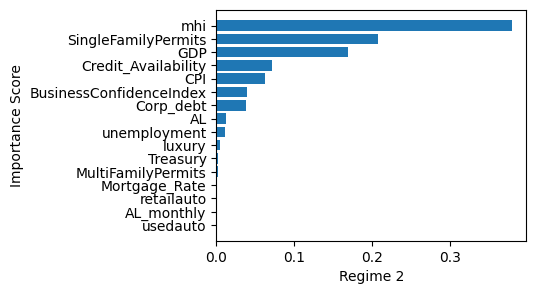

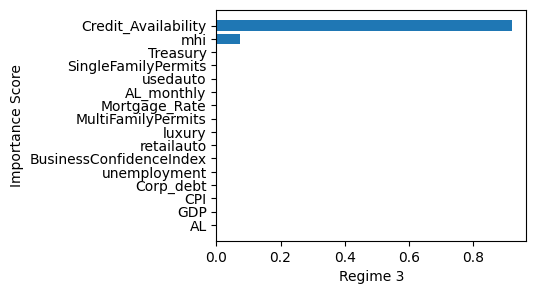

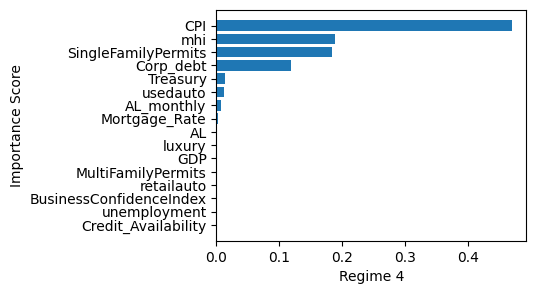

In [65]:
data_index = df_temp_sd.corr()['HPI'].sort_values(ascending=False).index

for i in range(4):
    data = sd_data.loc[regimes[i]]
    y = data[['HPI_pct']]
    X = data.drop(['HPI', 'HPI_pct'], axis =1)

    # Train a decision tree model on the entire dataset
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importance
    feature_importance = model.feature_importances_

    # Visualize the results
    f_i = list(zip(model.feature_names_in_, model.feature_importances_))
    f_i.sort(key = lambda x : x[1])
    plt.figure(figsize=(4, 3))
    plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
    plt.xlabel("Regime " + str(i+1))
    plt.ylabel("Importance Score")
    plt.show();

San Diego, highly correlated features: permits, mhi, gdp, credit, bci

In [ ]:
#sd_data.to_csv('sd_data.csv', index=False)

In [68]:
#sd = pd.read_csv('sd_data.csv')
#sd.set_index('Date',inplace=True)
sd_new = sd_data[['Credit_Availability','mhi','SingleFamilyPermits','GDP','HPI', 'CPI']]

## Hyperparameter Optimization & Model Training
- optimize features for model training

In [69]:
!pip install keras_tuner
!pip install tensorflow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [70]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.regularizers import l2
from keras_tuner import RandomSearch, HyperModel
import keras
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

define GRU model

In [71]:
class GRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(GRU(
            units=hp.Int('units', min_value=15, max_value=120, step=30),
            activation=hp.Choice('activation', values=['relu', 'tanh']),
            input_shape=self.input_shape,
            kernel_regularizer=l2(0.01)
        ))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='mse'
        )
        return model

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [72]:
def forecast_hpi(dataset_name):
    # Load and prepare data
    data = dataset_name
    # Ensure the index is a DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Add lag features
    for lag in [1, 2, 3, 6, 12]:
        data[f'HPI_lag{lag}'] = data['HPI'].shift(lag)

    # Drop rows with NaN values
    data = data.dropna()

    # Select relevant features
    features = ['HPI'] + [f'HPI_lag{lag}' for lag in [1, 2, 3, 6, 12]]

    # Create rolling window features
    rolling_windows = [3, 6, 12]
    for window in rolling_windows:
        data[f'HPI_roll_mean_{window}'] = data['HPI'].rolling(window).mean()
        data[f'HPI_roll_std_{window}'] = data['HPI'].rolling(window).std()

    # Drop rows with NaN values
    data = data.dropna()

    # Update the list of features
    features += [f'HPI_roll_mean_{window}' for window in rolling_windows]
    features += [f'HPI_roll_std_{window}' for window in rolling_windows]

    # Scale the features
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data[features])

    # Create sequences
    n_steps = 12
    X, y = create_sequences(data_scaled, n_steps)

    # Clear previous tuner state
    tuner_dir = 'my_dir/hpi_tuning'
    if os.path.exists(tuner_dir):
        import shutil
        shutil.rmtree(tuner_dir)

    # Define hypermodel
    hypermodel = GRUHyperModel(input_shape=(n_steps, X.shape[2]))

    # Hyperparameter tuning
    tuner = RandomSearch(
        hypermodel,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=2,
        directory='my_dir',
        project_name='hpi_tuning'
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Split the data (adjust according to your data size)
    split = int(0.75 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Get the corresponding dates
    dates = data.index[n_steps:]
    dates_train, dates_test = dates[:split], dates[split:]

    # Perform the hyperparameter tuning
    tuner.search(X_train, y_train, epochs=250, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Get the best model
    best_model = tuner.get_best_models(num_models=1)[0]

    # Predicting the test and train sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Inverse transform for plotting if normalization was applied
    y_train_rescaled = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((len(y_train), data_scaled.shape[1]-1))), axis=1))[:, 0]
    y_train_pred_rescaled = scaler.inverse_transform(np.concatenate((y_train_pred.reshape(-1, 1), np.zeros((len(y_train_pred), data_scaled.shape[1]-1))), axis=1))[:, 0]
    y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), data_scaled.shape[1]-1))), axis=1))[:, 0]
    y_test_pred_rescaled = scaler.inverse_transform(np.concatenate((y_test_pred.reshape(-1, 1), np.zeros((len(y_test_pred), data_scaled.shape[1]-1))), axis=1))[:, 0]

    # calculate MSE
    mse_train = mean_squared_error(y_train_rescaled, y_train_pred_rescaled)
    mse_test = mean_squared_error(y_test_rescaled, y_test_pred_rescaled)
    print(f'Training MSE: {mse_train}')
    print(f'Test MSE: {mse_test}')

    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
    rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
    print(f'Training RMSE: {rmse_train}')
    print(f'Test RMSE: {rmse_test}')

    # Calculate R^2
    r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
    r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

    print(f'Training R^2: {r2_train}')
    print(f'Test R^2: {r2_test}')

    # Plotting the results with both train and test data
    plt.figure(figsize=(10, 6))
    plt.plot(dates_train, y_train_rescaled, label='True Value - Train')
    plt.plot(dates_train, y_train_pred_rescaled, label='Predicted Value - Train')
    plt.plot(dates_test, y_test_rescaled, label='True Value - Test')
    plt.plot(dates_test, y_test_pred_rescaled, label='Predicted Value - Test')
    plt.title('HPI Prediction Performance')
    plt.xlabel('Date')
    plt.ylabel('HPI Value')
    plt.legend()
    plt.show()

In [73]:
dallas_new

,BusinessConfidenceIndex,Credit_Availability,GDP,Corp_debt,Treasury,mhi,HPI,MultiFamilyPermits
Date,,,,,,,,
1985-10-01,0.002599,-0.061431,0.004337,0.021966,-0.083916,0.002646,106.180000,844.444897
1985-11-01,0.002352,-0.371120,0.004318,0.021494,-0.137405,0.002712,106.353333,700.477961
1985-12-01,0.001304,-0.590129,0.004785,0.007002,-0.097345,0.002634,106.526667,691.102791
1986-01-01,-0.000086,-1.439791,0.004763,0.006953,0.068627,0.002696,106.700000,545.329267
1986-02-01,-0.000218,-6.541667,0.004740,0.006905,-0.614679,0.002621,107.490000,577.995524
...,...,...,...,...,...,...,...,...
2021-09-01,-0.000461,0.355602,0.011549,0.013933,0.127273,0.009079,346.256667,789.000000
2021-10-01,0.000394,0.262321,0.011418,0.013741,-0.137097,0.008997,351.230000,551.000000
2021-11-01,0.000021,-0.199845,0.011289,0.013555,-0.149533,0.008917,357.850000,910.000000



- {city}_new are the df that is adjusted based on lags
- if you rerun the code, you might get different result for feature importance. You could choose the features based on you search. They all work in a similar way and the performance of the model is almost the same.
- if you want to re-run the same dataset, remember to reset it because the code will append additional lag columns
- currently set 10trials with each trials runs 2times, which is total 20 trials.
- remember to check the dates need to be index not a column

In [75]:
import os

Trial 10 Complete [00h 01m 20s]
val_loss: 0.0015076899726409465

Best val_loss So Far: 0.00033179162710439414
Total elapsed time: 00h 07m 48s
4/4 [==============================] - 0s 6ms/step
Training MSE: 10.170617924532268
Test MSE: 16.27227390152224
Training RMSE: 3.1891406247659053
Test RMSE: 4.033890665538946
Training R^2: 0.9862751268102156
Test R^2: 0.9926858990851959


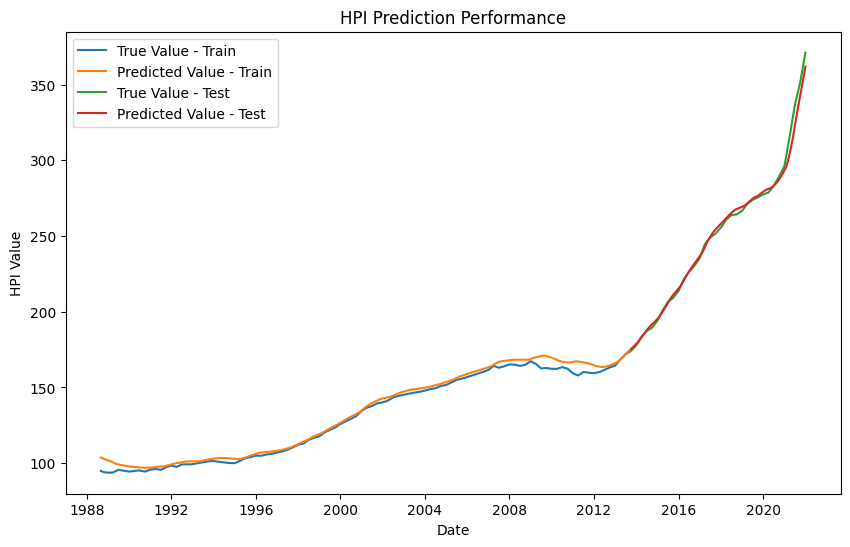

In [76]:
forecast_hpi(dallas_new)

In [ ]:
# remember to set date as index

Trial 10 Complete [00h 01m 00s]
val_loss: 0.0008287625678349286

Best val_loss So Far: 0.0008287625678349286
Total elapsed time: 00h 12m 58s
4/4 [==============================] - 0s 5ms/step
Training MSE: 105.06845023208375
Test MSE: 28.47802878546455
Training RMSE: 10.25029025111405
Test RMSE: 5.336480936484693
Training R^2: 0.9816853149834088
Test R^2: 0.9922708583608016


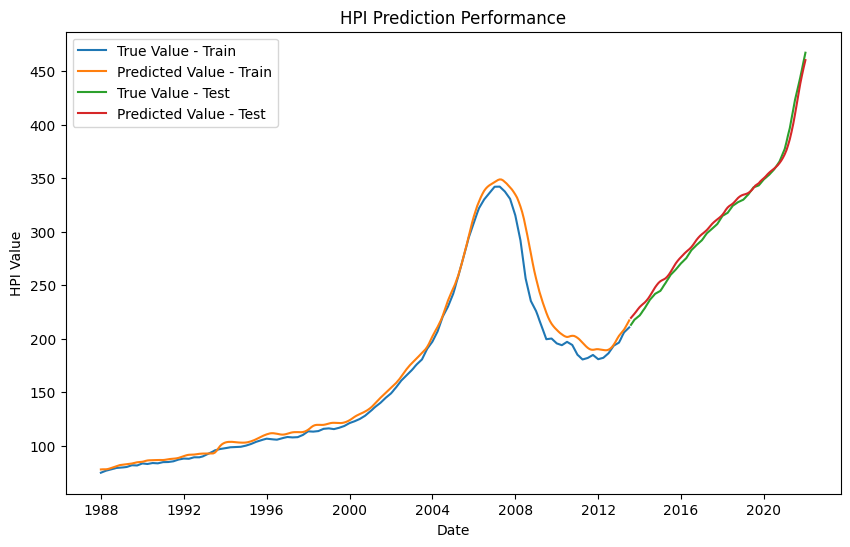

In [77]:
forecast_hpi(miami_new)

Trial 10 Complete [00h 02m 16s]
val_loss: 0.0008418892684858292

Best val_loss So Far: 0.0006450708315242082
Total elapsed time: 00h 07m 36s
4/4 [==============================] - 0s 5ms/step
Training MSE: 5.818856834032756
Test MSE: 25.719259893441393
Training RMSE: 2.4122306759579932
Test RMSE: 5.071415965333685
Training R^2: 0.9973382573965683
Test R^2: 0.9936630927705052


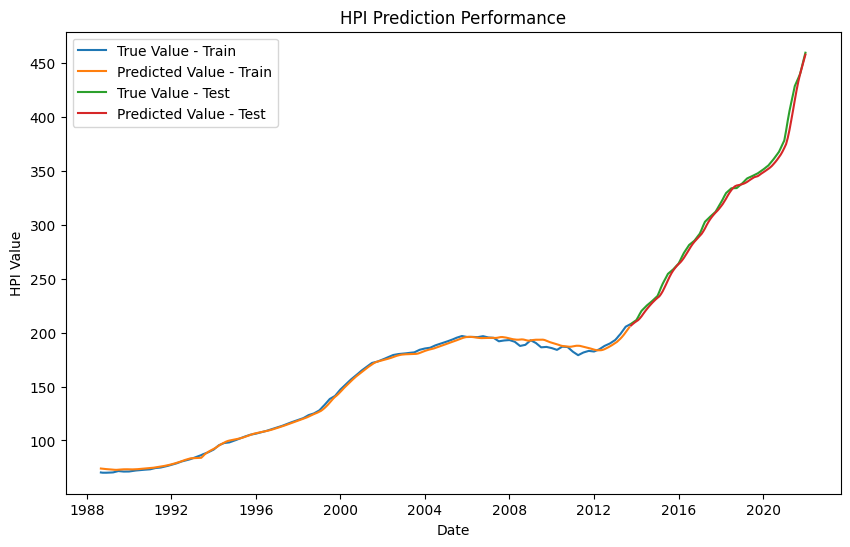

In [78]:
forecast_hpi(denver_new)

Trial 10 Complete [00h 01m 41s]
val_loss: 0.0013676808739546686

Best val_loss So Far: 0.000641913793515414
Total elapsed time: 00h 06m 46s
4/4 [==============================] - 0s 5ms/step
Training MSE: 72.0816635452866
Test MSE: 5.773108159071022
Training RMSE: 8.49009208108408
Test RMSE: 2.4027293145652138
Training R^2: 0.9868495338092403
Test R^2: 0.9979028650362539


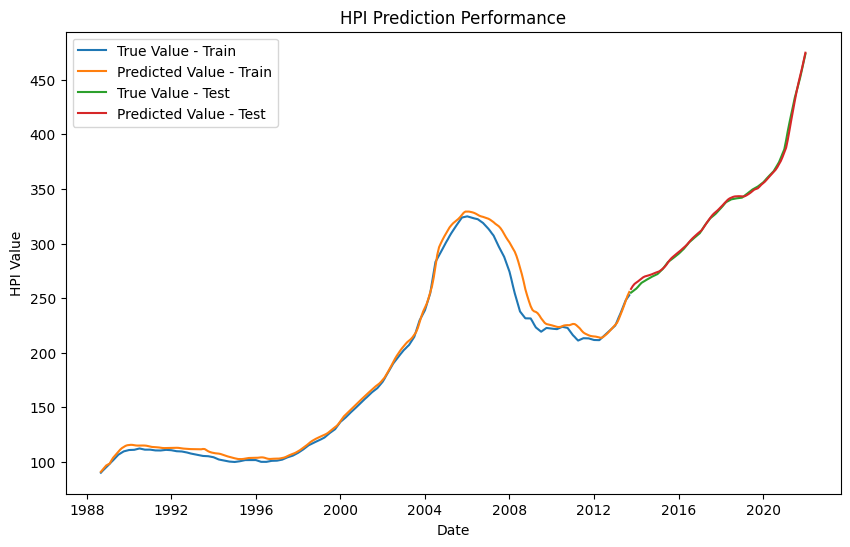

In [79]:
forecast_hpi(sd_new)